In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Cargo el archivo CSV 
data = pd.read_csv('dirty_cafe_sales.csv')

#muestro las primeras filas para entender la estructura del dataset
print("\nPrimera filas del dataset:")
data.head()

# Información general de las columnas
print("\nInformación del dataset:")
data.info()


# Revisar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe(include="all"))

#Identificamos columnas con problemas como valores faltantes (NaN), 
#valores inconsistentes (e.g., "UNKNOWN"), y columnas con datos en el formato incorrecto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB

Estadísticas descriptivas:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method

### INSPECCION DE DATOS: 

**TransactionID:** identificador único para cada transacción
**Item:** el producto comprado
**Quantity:** la cantidad comprada
**Price Per Unit:** el precio unitario del producto
**Total Spent:** el total pagado
**Payment Method:** el metodo de pago
**Location:** Lugar donde se efectuo la compra
**Transaction Date:** la fecha de la transaccion

**Análisis:**

1. Hay valores UNKNOWN y ERROR en las columnas categóricas (Payment Method, Item, Location).

2. Hay valores faltantes (NaN) en las columnas:
    Quantity (441 valores faltantes)
    Price Per Unit (491 valores faltantes)
    Transaction Date (144 valores faltantes)

3. Las columnas Quantity y Price Per Unit deberían ser completamente numéricas.
4. La columna Item contiene valores incorrectos como UNKNOWN y ERROR.


In [159]:

# Contar valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Buscar valores 'UNKNOWN' y 'ERROR' en columnas específicas
print("\nValores únicos en columnas categóricas:")
print("Payment Method:", data['Payment Method'].unique())
print("Item:", data['Item'].unique())
print("Location:", data['Location'].unique())
print("Total Spent:", data['Total Spent'].unique())
print("Transaction Date:", data['Transaction Date'].unique())
#Confirmamos qué columnas tienen problemas y qué tipo de problemas son (faltantes, valores no válidos, etc.).


Valores faltantes por columna:
Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method         0
Location            2266
Transaction Date       0
dtype: int64

Valores únicos en columnas categóricas:
Payment Method: ['Credit Card' 'Cash' 'Digital Wallet']
Item: ['Coffee' 'Cake' 'Cookie' 'Smoothie' 'Sandwich' 'Salad' 'Juice' 'Tea']
Location: ['Takeaway' 'In-store' nan]
Total Spent: ['4.0' '12.0' 'ERROR' '20.0' '16.0' '25.0' '8.0' '15.0' '6.0' '5.0' '10.0'
 '2.0' '3.0' '1.0' '7.5' '9.0' '4.5' 'UNKNOWN' '1.5']
Transaction Date: ['2023-09-08' '2023-05-16' '2023-07-19' '2023-06-11' '2023-03-31'
 '2023-10-28' '2023-11-07' '2023-05-03' '2023-11-15' '2023-02-24'
 '2023-03-25' '2023-01-15' '2023-04-04' '2023-03-30' '2023-12-01'
 '2023-06-03' '2023-04-20' '2023-04-10' '2023-03-11' '2023-10-09'
 '2023-05-28' '2023-04-29' '2023-03-22' '2023-11-03' '2023-06-26'
 '2023-11-25' '2023-12-05' '2023-03-19' '2023-04-19' 

### LIMPIEZA DE DATOS

### Paso 1: Limpieza de columnas categóricas
Primero abordemos las columnas categóricas con valores no válidos (UNKNOWN, ERROR) y decidamos qué hacer.
Convertiremos UNKNOWN y ERROR en NaN, y luego evaluaremos si es viable rellenar los datos faltantes o eliminarlos.

In [161]:
# Reemplazar 'UNKNOWN' y 'ERROR' con NaN en columnas categóricas
categorical_columns = ["Payment Method", "Item", "Location", "Transaction Date" , "Total Spent"]
data[categorical_columns] = data[categorical_columns].replace(["UNKNOWN", "ERROR"], np.nan)

# Revisar valores únicos nuevamente
print("\nValores únicos después de reemplazar 'UNKNOWN' y 'ERROR':")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")



Valores únicos después de reemplazar 'UNKNOWN' y 'ERROR':
Payment Method: ['Credit Card' 'Cash' 'Digital Wallet']
Item: ['Coffee' 'Cake' 'Cookie' 'Smoothie' 'Sandwich' 'Salad' 'Juice' 'Tea']
Location: ['Takeaway' 'In-store' nan]
Transaction Date: ['2023-09-08' '2023-05-16' '2023-07-19' '2023-06-11' '2023-03-31'
 '2023-10-28' '2023-11-07' '2023-05-03' '2023-11-15' '2023-02-24'
 '2023-03-25' '2023-01-15' '2023-04-04' '2023-03-30' '2023-12-01'
 '2023-06-03' '2023-04-20' '2023-04-10' '2023-03-11' '2023-10-09'
 '2023-05-28' '2023-04-29' '2023-03-22' '2023-11-03' '2023-06-26'
 '2023-11-25' '2023-12-05' '2023-03-19' '2023-04-19' '2023-05-27'
 '2023-06-01' '2023-10-03' '2023-01-31' '2023-12-14' '2023-07-16'
 '2023-02-22' '2023-06-02' '2023-06-15' '2023-12-09' '2023-12-22'
 '2023-10-29' '2023-04-30' '2023-08-16' '2023-09-10' '2023-03-07'
 '2023-08-07' '2023-06-10' '2023-04-15' '2023-07-25' '2023-12-15'
 '2023-04-03' '2023-10-08' '2023-12-28' '2023-08-30' '2023-09-12'
 '2023-05-04' '2023-02-21'

### Paso 2: Limpieza de Columnas Numéricas
Las columnas Quantity y Price Per Unit contienen valores faltantes (NaN) y deben ser completamente numéricas. Vamos a convertirlas a números usando pd.to_numeric.

Acción: Convertimos las columnas a valores numéricos, reemplazando cualquier error con NaN.
Código:

### Paso 1: Eliminar Filas con NaN en Columnas Categóricas
eliminar filas donde las columnas Item y Payment Method tengan valores NaN, primero aplicaremos un filtro para eliminarlas.

In [190]:
# Eliminar filas con NaN en 'Item' y 'Payment Method'
data = data.dropna(subset=["Item", "Total Spent", "Transaction Date", "Location"])

# Verificar si aún quedan NaN en estas columnas
print("Valores faltantes después de eliminar NaN en 'Item' , 'Transaction Date'':")
print(data[["Item", "Total Spent", "Transaction Date", "Location"]].isnull().sum())


Valores faltantes después de eliminar NaN en 'Item' , 'Transaction Date'':
Item                0
Total Spent         0
Transaction Date    0
Location            0
dtype: int64


Paso 2: Rellenar Valores Faltantes en Columnas Numéricas con el Promedio
Para las columnas Quantity y Price Per Unit, rellenaremos los valores NaN con el promedio de cada columna

In [193]:
# Rellenar valores faltantes en columnas numéricas con el promedio
for col in numeric_columns:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)
    print(f"{col} rellenado con su promedio: {mean_value:.2f}")

# Verificar que no queden valores NaN en columnas numéricas
print("\nValores faltantes en columnas numéricas después de rellenar:")
print(data[numeric_columns].isnull().sum())



Quantity rellenado con su promedio: 3.03
Price Per Unit rellenado con su promedio: 2.95

Valores faltantes en columnas numéricas después de rellenar:
Quantity          0
Price Per Unit    0
dtype: int64


In [199]:
# Resumen actualizado
print("\nResumen actualizado del dataset:")
print(data.info())

# Estadísticas descriptivas actualizadas
print("\nEstadísticas descriptivas después de limpieza:")
print(data.describe(include="all"))

# Revisar valores únicos nuevamente
print("\nValores únicos después de reemplazar 'UNKNOWN' y 'ERROR':")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

data.tail(30)
data.sample(20)


Resumen actualizado del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3415 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    3415 non-null   object 
 1   Item              3415 non-null   object 
 2   Quantity          3415 non-null   float64
 3   Price Per Unit    3415 non-null   float64
 4   Total Spent       3415 non-null   object 
 5   Payment Method    3415 non-null   object 
 6   Location          3415 non-null   object 
 7   Transaction Date  3415 non-null   object 
dtypes: float64(2), object(6)
memory usage: 240.1+ KB
None

Estadísticas descriptivas después de limpieza:
       Transaction ID   Item     Quantity  Price Per Unit Total Spent  \
count            3415   3415  3415.000000     3415.000000        3415   
unique           3415      8          NaN             NaN          17   
top       TXN_1961373  Juice          NaN             NaN         6.0

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
5690,TXN_4856575,Salad,3.00000,5.000000,15.0,Digital Wallet,In-store,2023-09-10
9094,TXN_4747863,Cookie,2.00000,1.000000,2.0,Digital Wallet,In-store,2023-10-04
7937,TXN_6714749,Sandwich,1.00000,4.000000,4.0,Credit Card,Takeaway,2023-08-02
2379,TXN_6491662,Coffee,2.00000,2.000000,4.0,Digital Wallet,Takeaway,2023-10-06
3969,TXN_5357157,Juice,4.00000,3.000000,12.0,Credit Card,In-store,2023-05-21
6334,TXN_9496791,Salad,4.00000,5.000000,20.0,Credit Card,In-store,2023-07-19
8235,TXN_3270584,Cake,3.00000,3.000000,9.0,Credit Card,Takeaway,2023-01-10
1450,TXN_4548466,Tea,4.00000,1.500000,6.0,Credit Card,Takeaway,2023-11-30
9046,TXN_3951552,Salad,2.00000,2.964825,10.0,Cash,In-store,2023-03-25
953,TXN_8336656,Salad,5.00000,5.000000,25.0,Cash,Takeaway,2023-12-02


## Preguntas clave para el análisis:
### ¿Qué productos son los más vendidos?

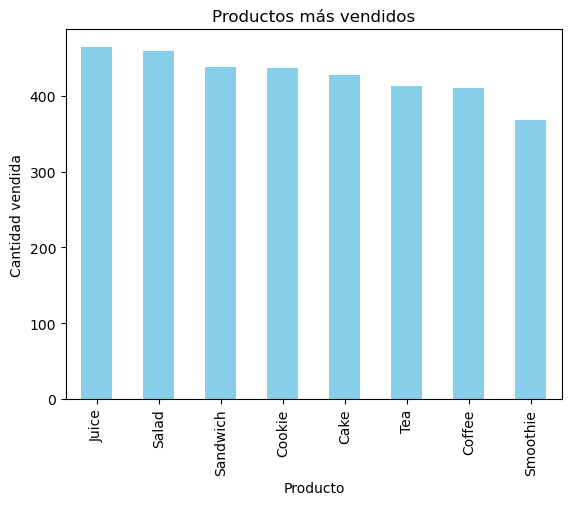

In [204]:
# Contar las ventas por producto
item_counts = data['Item'].value_counts()

# Graficar productos más vendidos
item_counts.plot(kind='bar', title='Productos más vendidos', color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.show()

### ¿Cuál es la ubicación más rentable?


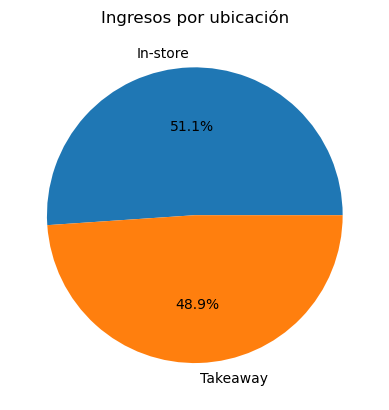

In [231]:

# Asegúrate de que 'Total Spent' sea numérico y manejar valores no numéricos
data['Total Spent'] = pd.to_numeric(data['Total Spent'], errors='coerce')

# Eliminar filas con NaN si es necesario
data = data.dropna(subset=['Total Spent'])

# Sumar ingresos por ubicación
location_revenue = data.groupby('Location')['Total Spent'].sum()

# Graficar ingresos por ubicación
location_revenue.plot(kind='pie', autopct='%1.1f%%', title='Ingresos por ubicación')
plt.ylabel('')
plt.show()



### ¿Qué métodos de pago son los más utilizados?

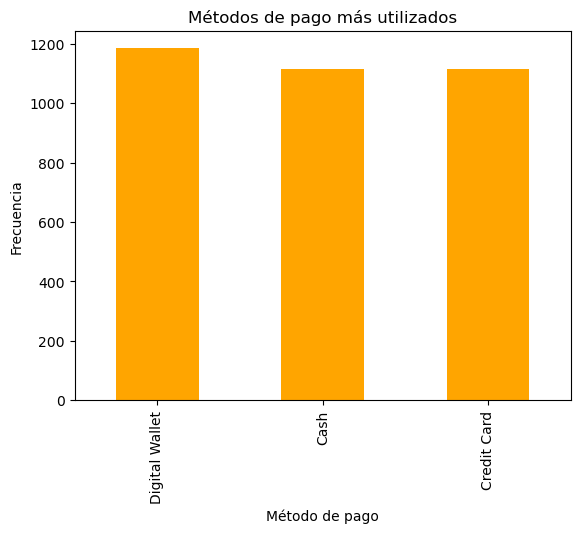

In [214]:
# Contar métodos de pago
payment_counts = data['Payment Method'].value_counts()

# Graficar métodos de pago
payment_counts.plot(kind='bar', title='Métodos de pago más utilizados', color='orange')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.show()


#### ¿Cuáles son los días más rentables?

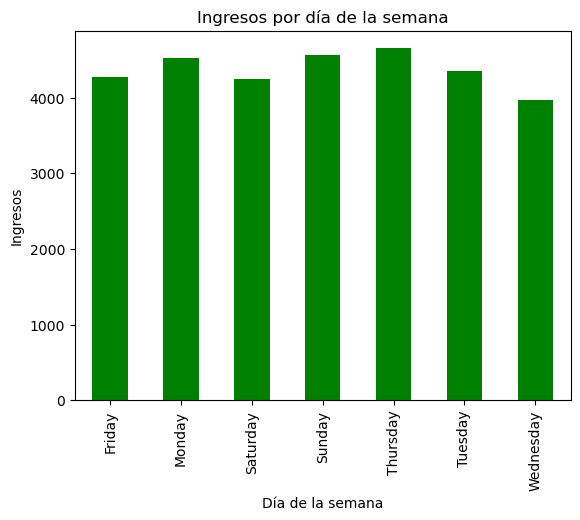

In [233]:
# Convertir columna "Transaction Date" a formato datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])


# Extraer día de la semana
data['Day of Week'] = data['Transaction Date'].dt.day_name()

# Sumar ingresos por día
day_revenue = data.groupby('Day of Week')['Total Spent'].sum()

# Graficar ingresos por día
day_revenue.plot(kind='bar', title='Ingresos por día de la semana', color='green')
plt.xlabel('Día de la semana')
plt.ylabel('Ingresos')
plt.show()
